**Analisis de calidad de los datos y analisis de outliers**

A continuación vamos a preparar los datos para el análisis posterior de cohortes. Sabemos que nuestro cliente está ubicado en la costa sur de los Estados Unidos, además de Newyork.

In [2]:
%run './EDA.ipynb'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
['/Users/juli/uoc/02_intensivoUOC/git/AvoEconomics', '/opt/anaconda3/lib/python39.zip', '/opt/anaconda3/lib/python3.9', '/opt/anaconda3/lib/p

In [3]:
df_avocado_hotels.columns
#df_avocado_hotels.isnull().sum()

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type',
       'year', 'region', 'location', 'cant_toneladas', 'precio_tonelada'],
      dtype='object')

In [4]:
df_producer_prices
#df_producer_prices.isnull().sum()

,Area Code (M49),Area,Element,Year,Unit,Value
0,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2015,USD,442.0
1,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2020,USD,2585.6
2,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2021,USD,2589.2
3,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2022,USD,2749.6
4,76,Brazil,Producer Price (USD/tonne),2018,USD,366.3
...,...,...,...,...,...,...
103,840,United States of America,Producer Price (USD/tonne),2018,USD,2403.0
104,840,United States of America,Producer Price (USD/tonne),2019,USD,3263.0
105,840,United States of America,Producer Price (USD/tonne),2020,USD,2282.0
106,840,United States of America,Producer Price (USD/tonne),2021,USD,2524.3


In [5]:
df_livestock
#df_livestock.isnull().sum()

,Area Code (M49),Area,Element Code,Element,Year,Unit,Value
18,32,Argentina,5910,Export Quantity,2015,t,84.18
19,32,Argentina,5922,Export Value,2015,1000 USD,217.00
22,32,Argentina,5910,Export Quantity,2016,t,142.60
23,32,Argentina,5922,Export Value,2016,1000 USD,237.00
26,32,Argentina,5910,Export Quantity,2017,t,12.62
...,...,...,...,...,...,...,...
897,19,Americas,5922,Export Value,2020,1000 USD,4162986.00
900,19,Americas,5910,Export Quantity,2021,t,2107300.62
901,19,Americas,5922,Export Value,2021,1000 USD,4787698.00
904,19,Americas,5910,Export Quantity,2022,t,1968498.78


In [6]:
# Verificar homogeneización
units_check = {
    'df_avocado_hotels': df_avocado_hotels.dtypes,
    'df_producer_prices': df_producer_prices.dtypes,
    'df_livestock': df_livestock.dtypes,
}
units_check

{'df_avocado_hotels': Date               datetime64[ns]
 AveragePrice              float64
 Total Volume              float64
 4046                      float64
 4225                      float64
 4770                      float64
 type                       object
 year                        int64
 region                     object
 location                   object
 cant_toneladas            float64
 precio_tonelada           float64
 dtype: object,
 'df_producer_prices': Area Code (M49)      int64
 Area                object
 Element             object
 Year                 int64
 Unit                object
 Value              float64
 dtype: object,
 'df_livestock': Area Code (M49)      int64
 Area                object
 Element Code         int64
 Element             object
 Year                 int64
 Unit                object
 Value              float64
 dtype: object}

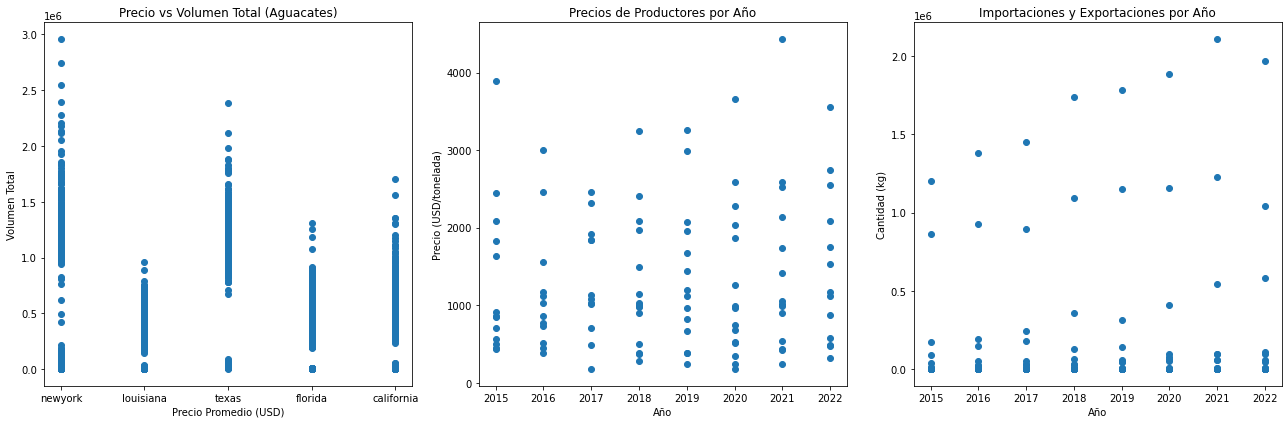

In [7]:
# Graficar dispersión para detección de outliers
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Scatter Plot 1: Precio vs Volumen Total (Aguacates)
#ax[0].scatter(df_avocado_hotels['AveragePrice'], df_avocado_hotels['Total Volume'])
ax[0].scatter(df_avocado_hotels['location'], df_avocado_hotels['Total Volume'])

ax[0].set_title("Precio vs Volumen Total (Aguacates)")
ax[0].set_xlabel("Precio Promedio (USD)")
ax[0].set_ylabel("Volumen Total")

# Scatter Plot 2: Precio de Productores por Año
ax[1].scatter(df_producer_prices['Year'], df_producer_prices['Value'])
ax[1].set_title("Precios de Productores por Año")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Precio (USD/tonelada)")

# Scatter Plot 3: Importaciones vs Exportaciones (Ganado)
df_import_export = df_livestock[df_livestock['Element'].isin(['Import Quantity','Export Quantity'])]
ax[2].scatter(df_import_export['Year'], df_import_export['Value'])
ax[2].set_title("Importaciones y Exportaciones por Año")
ax[2].set_xlabel("Año")
ax[2].set_ylabel("Cantidad (kg)")

plt.tight_layout()
plt.show()



In [8]:
# Verificar fechas comunes
date_check = {
    'avocado_dates': (df_avocado_hotels['Date'].min(), df_avocado_hotels['Date'].max()),
    'producer_prices_years': (df_producer_prices['Year'].min(), df_producer_prices['Year'].max()),
    'livestock_years': (df_livestock['Year'].min(), df_livestock['Year'].max())
}
date_check

{'avocado_dates': (Timestamp('2015-01-04 00:00:00'),
  Timestamp('2018-03-25 00:00:00')),
 'producer_prices_years': (2015, 2022),
 'livestock_years': (2015, 2022)}

##Pruebas fallidas

In [22]:
# Completar las fechas del 2018 del data set de la compra de aguacates de compras del hotel

# Filtrar datos para New York
df_newyork = df_avocado_filtered[df_avocado_filtered['location'] == 'newyork']

# Calcular el promedio mensual de AveragePrice para New York en los años 2015-2017
monthly_avg_price_ny = df_newyork.groupby(['Month'])['AveragePrice'].mean().reset_index()

# Crear un rango de fechas para todo el año 2018
date_range_2018 = pd.date_range(start='2018-01-01', end='2018-12-31', freq='W')

# Generar precios para 2018 basados en el promedio mensual de New York
completed_2018_ny = []
for date in date_range_2018:
    month = date.month
    # Obtener el promedio mensual correspondiente para New York
    avg_price = monthly_avg_price_ny[monthly_avg_price_ny['Month'] == month]['AveragePrice'].values[0]
    # Añadir ligera variación para realismo, asegurando precios positivos
    avg_price_with_variation = max(avg_price + np.random.uniform(-0.05, 0.05), 0.01)
    # Generar un volumen total basado en la media y desviación estándar de New York
    total_volume = max(np.random.normal(df_newyork['Total Volume'].mean(), df_newyork['Total Volume'].std()), 0)
    # Añadir datos
    completed_2018_ny.append({
        'Date': date,
        'AveragePrice': avg_price_with_variation,
        'Total Volume': total_volume,
        'location': 'newyork'
    })

# Crear un DataFrame con los datos generados para New York en 2018
df_completed_2018_ny = pd.DataFrame(completed_2018_ny)

# Visualizar los datos generados para 2018 en New York
df_completed_2018_ny.head()



,Date,AveragePrice,Total Volume,location
0,2018-01-07,1.604243,3.250430e+05,newyork
1,2018-01-14,1.543898,0.000000e+00,newyork
2,2018-01-21,1.613896,9.323460e+05,newyork
3,2018-01-28,1.597841,5.455836e+04,newyork
4,2018-02-04,1.523765,1.503915e+06,newyork


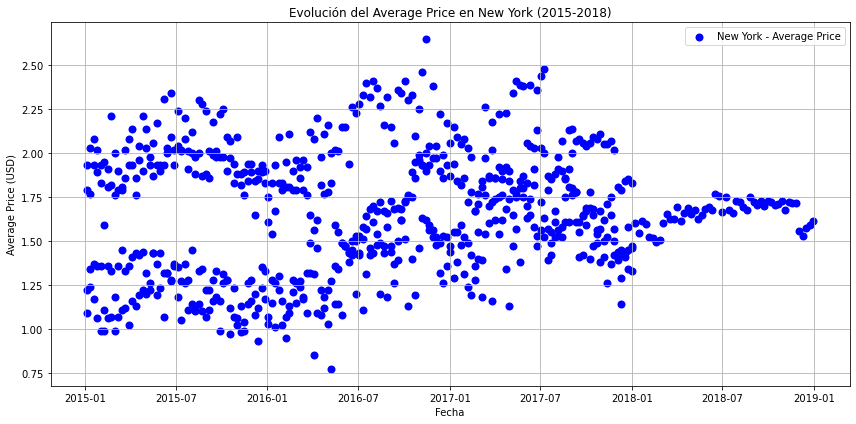

In [38]:
# Visualizar la evolución de AveragePrice para New York
plt.figure(figsize=(12, 6))

# Filtrar los datos de New York, incluyendo los años 2015-2018
df_ny_extended = pd.concat([df_newyork, df_completed_2018_ny], ignore_index=True)
plt.scatter(df_ny_extended['Date'], df_ny_extended['AveragePrice'], label='New York - Average Price', linewidth=2, color='blue')

plt.title('Evolución del Average Price en New York (2015-2018)')
plt.xlabel('Fecha')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [36]:
# Calcular el promedio mensual de AveragePrice para cada región en los años 2015-2017
monthly_avg_price_by_region = df_avocado_filtered.groupby(['Month', 'region'])['AveragePrice'].mean().reset_index()

# Generar datos para 2018 basados en el patrón mensual y región
completed_2018_by_region = []

for date in date_range_2018:
    month = date.month
    for region in df_avocado_filtered['region'].unique():
        # Obtener el promedio mensual correspondiente por región
        avg_price = monthly_avg_price_by_region[
            (monthly_avg_price_by_region['Month'] == month) &
            (monthly_avg_price_by_region['region'] == region)
        ]['AveragePrice'].values[0]

        # Añadir una ligera variación aleatoria para el realismo
        avg_price_with_variation = max(avg_price + np.random.uniform(-0.05, 0.05), 0.01)  # Evitar precios negativos
        total_volume = max(np.random.normal(df_avocado_filtered['Total Volume'].mean(),
                                            df_avocado_filtered['Total Volume'].std()), 0)  # Evitar volúmenes negativos

        # Añadir los datos a la lista
        completed_2018_by_region.append({
            'Date': date,
            'AveragePrice': avg_price_with_variation,
            'Total Volume': total_volume,
            'region': region
        })

# Crear un DataFrame con los datos generados para 2018 por región
df_completed_2018_by_region = pd.DataFrame(completed_2018_by_region)

# Concatenar los DataFrames
df_avocado_extended_by_region = pd.concat([df_avocado_filtered, df_completed_2018_by_region], ignore_index=True)

# Visualizar las primeras filas del nuevo DataFrame extendido por región
df_avocado_extended_by_region.tail()


,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,location,cant_toneladas,precio_tonelada,Month
4021,2018-12-30,1.588191,2.777154e+05,NaN,NaN,NaN,NaN,NaN,NewYork,NaN,NaN,NaN,NaN
4022,2018-12-30,1.324936,2.976036e+05,NaN,NaN,NaN,NaN,NaN,Orlando,NaN,NaN,NaN,NaN
4023,2018-12-30,1.457326,0.000000e+00,NaN,NaN,NaN,NaN,NaN,Sacramento,NaN,NaN,NaN,NaN
4024,2018-12-30,1.254338,4.481381e+05,NaN,NaN,NaN,NaN,NaN,SanDiego,NaN,NaN,NaN,NaN
4025,2018-12-30,1.650519,1.325083e+06,NaN,NaN,NaN,NaN,NaN,SanFrancisco,NaN,NaN,NaN,NaN


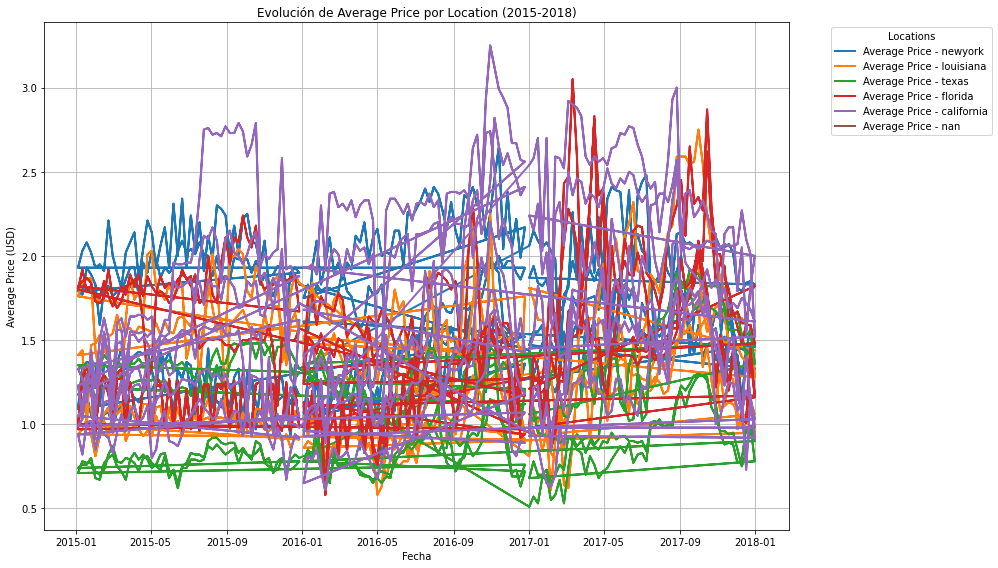

In [37]:
# Visualizar los datos existentes de AveragePrice por location en el dataset
# Concatenar los datos originales y los generados para 2018
df_extended = pd.concat([df_avocado_filtered, df_avocado_extended_by_region], ignore_index=True)

# Visualizar la evolución del AveragePrice por location, incluyendo los datos de 2018
plt.figure(figsize=(14, 8))

# Gráfico de líneas de AveragePrice por location
for location in df_extended['location'].unique():
    location_data = df_extended[df_extended['location'] == location]
    plt.plot(location_data['Date'], location_data['AveragePrice'], label=f'Average Price - {location}', linewidth=2)

plt.title('Evolución de Average Price por Location (2015-2018)')
plt.xlabel('Fecha')
plt.ylabel('Average Price (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Locations")
plt.grid(True)
plt.tight_layout()
plt.show()

